<a href="https://colab.research.google.com/github/DS-Heejae/tensorflow/blob/master/1_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Understanding ImageGenerator**

![picture](https://drive.google.com/uc?id=1f50Ou7Su4-PHUl1NkhXn40jm_n_Jl1nq)


One feature of the image generator is that you can point it at a directory and then the sub-directories of that will automatically generate labels for you.

 So for example, consider this directory structure. You have an images directory and in that, you have sub-directories for training and validation. When you put sub-directories in these for horses and humans and store the requisite images in there, the image generator can create a feeder for those images and auto label them for you.

 So for example, if I point an image generator at the training directory, the labels will be horses and humans and all of the images in each directory will be loaded and labeled accordingly. Similarly, if I point one at the validation directory, the same thing will happen.




In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1/255)
# I'm going to pass rescale to it to normalize the data.

In [0]:
train_generator = train_datagen.flow_from_directory( #1
    '/tmp/horse-or-human/', #2
    target_size = (300, 300), #3
    batch_size = 128, #4
    class_mode='binary') #5

Found 1027 images belonging to 2 classes.


1. You can then call the flow from directory method on it to get it to load images from that directory and its sub-directories. ***It's a common mistake that people point the generator at the sub-directory. It will fail in that circumstance. You should always point it at the directory that contains sub-directories that contain your images.***  

2. The names of the sub-directories will be the labels for your images that are contained within them.So make sure that the directory you're pointing to is the correct one. You put it in the second parameter like this. 

3. Now, images might come in all shapes and sizes and unfortunately for training a neural network, the input data all has to be the same size, so the images will need to be resized to make them consistent. The nice thing about this code is that the images are resized for you as they're loaded. So you don't need to preprocess thousands of images on your file system. But you could have done that if you wanted to. The advantage of doing it at runtime like this is that you can then experiment with different sizes without impacting your source data. While the horses and humans dataset is already in 300 by 300, ***when you use other datasets they may not always be uniformly sized. So this is really useful for you.*** 

4. The images will be loaded for training and validation in batches where it's more efficient than doing it one by one. Now, there's a whole science to calculating batch size that's beyond the scope of this course, but you can experiment with different sizes to see the impact on the performance by changing this parameter. 


5. Finally, there's the class mode. Now, this is a binary classifier i.e. it picks between two different things; horses and humans, so we specify that here. Other options in particular for more than two things will be explored later in the course. The validation generator should be exactly the same except of course it points at a different directory, the one containing the sub-directories containing the test images.

2. Defining a ConvNet to use complex images

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.kears.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.kears.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activaion='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

So here's the code. As you can see, it's the sequential as before with convolutions and pooling before we get to the dense layers at the bottom. But let's highlight some of the differences. 

First of all, you'll notice that there are three sets of convolution pooling layers at the top. This reflects the higher complexity and size of the images. Remember our earlier our 28 by 28.5 to 13 and then five before flattening, well, now we have 300 by 300. So we start at 298 by 298 and then have that etc., etc. until by the end, we're at a 35 by 35 image. We can even add another couple of layers to this if we wanted to get to the same ballpark size as previously, but we'll keep it at three for now. 


**Another thing to pay attention to is the input shape. We resize their images to be 300 by 300 as they were loaded, but they're also color images.*** **So there are three bytes per pixel. One byte for the red, one for green, and one for the blue channel, and that's a common 24-bit color pattern.** *

If you're paying really close attention, you can see that the output layer has also changed. Remember before when you created the output layer, you had one neuron per class, but now there's only one neuron for two classes. That's because we're using a different activation function ***where sigmoid is great for binary classification, where one class will tend towards zero and the other class tending towards one***. You could use two neurons here if you want, and the same softmax function as before, but for binary this is a bit more efficient. 

![picture](https://drive.google.com/uc?id=1uDXZccUXgpVVsZWCyeZ_gV-Xzvee2FNq)

Now, if we take a look at our model summary, we can see the journey of the image data through the convolutions The 300 by 300 becomes 298 by 298 after the three by three filter, it gets pulled to 149 by 149 which in turn gets reduced to 73 by 73 after the filter that then gets pulled to 35 by 35, this will then get flattened, so 64 convolutions that are 35 squared and shape will get fed into the DNN. If you multiply 35 by 35 by 64, you get 78,400, and that's the shape of the data once it comes out of the convolutions. If we had just fed raw 300 by 300 images without the convolutions, that would be over 900,000 values. So we've already reduced it quite a bit.

3. Training the ConvNet with fit_generator

https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['acc'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data = validation_generator,
    validation_steps=8,
    verbose=2)

NameError: ignored

In [0]:
Okay, we'll now compile the model and, as always, we have a loss function and an optimizer. When classifying the ten items of fashion, you might remember that your loss function was a categorical cross entropy. But because we're doing a binary choice here, let's pick a binary_crossentropy instead. Also, earlier we used an Adam optimizer. Now, you could do that again, but I thought it would be fun to use the RMSprop, where you can adjust the learning rate to experiment with performance. To understand learning rate and how all that fits together, check out this great video from deeplearning.ai that goes into it in a lot more detail.

For now, I'm not going to go into the details in this course. Okay, next up is the training, now, this looks a little different than before when you called model.fit. Because now you call model.fit_generator, and that's because we're using a generator instead of datasets. Remember the image generator from earlier, let's look at each parameter in detail. The first parameter is the training generator that you set up earlier. This streams the images from the training directory. Remember the batch size you used when you created it, it was 20, that's important in the next step. There are 1,024 images in the training directory, so we're loading them in 128 at a time. So in order to load them all, we need to do 8 batches. So we set the steps_per_epoch to cover that.

Here we just set the number of epochs to train for. This is a bit more complex, so let's use, say, 15 epochs in this case. And now we specify the validation set that comes from the validation_generator that we also created earlier. It had 256 images, and we wanted to handle them in batches of 32, so we will do 8 steps.


And the verbose parameter specifies how much to display while training is going on. With verbose set to 2, we'll get a little less animation hiding the epoch progress. 

In [0]:
import numpy as np
from google.colab import files #1
from keras.preprocessing import image

uploaded = files.upload() #1

for fn in uploaded .keys(): #1

  #predicting images
  path = '/conent/' + fn
  img = image.load_img(path, target_size=(300, 300)) #2
  x= image.img_to_array(img) #2
  x = np.expand_dims(x, axis=0) #2

  images = np.vstack([x]) #2
  classes = model.predict(images, batch_size=10) #3
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + "is a human")
  else:
    print(fn + "is a horse")

Once the model is trained, you will, of course, want to do some prediction on the model. 

1. So these parts are specific to Colab, they are what gives you the button that you can press to pick one or more images to upload. The image paths then get loaded into this list called uploaded. 

2. The loop then iterates through all of the images in that collection. And you can load an image and prepare it to input into the model with this code. Take note to ensure that the dimensions match the input dimensions that you specified when designing the model. 

3. You can then call model.predict, passing it the details, and it will return an array of classes. In the case of binary classification, this will only contain one item with a value close to 0 for one class and close to 1 for the other.

4. Walking through developing a ConvNet

In [0]:
#human - horse data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-04-10 02:11:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c18::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   108MB/s    in 1.3s    

2020-04-10 02:11:01 (108 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data.

In [0]:
#unzip
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory /tmp/horse-or-human, which in turn each contain horses and humans subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc. Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step.

Let's define each of these directories:

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

Now, let's see what the filenames look like in the horses and humans training directories:

In [0]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse25-3.png', 'horse29-0.png', 'horse15-8.png', 'horse09-9.png', 'horse04-4.png', 'horse44-4.png', 'horse06-6.png', 'horse26-5.png', 'horse47-4.png', 'horse37-9.png']
['human01-20.png', 'human10-24.png', 'human10-28.png', 'human03-09.png', 'human05-30.png', 'human12-11.png', 'human15-07.png', 'human11-04.png', 'human06-30.png', 'human13-24.png']



Let's find out the total number of horse and human images in the directories:

In [0]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527



Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

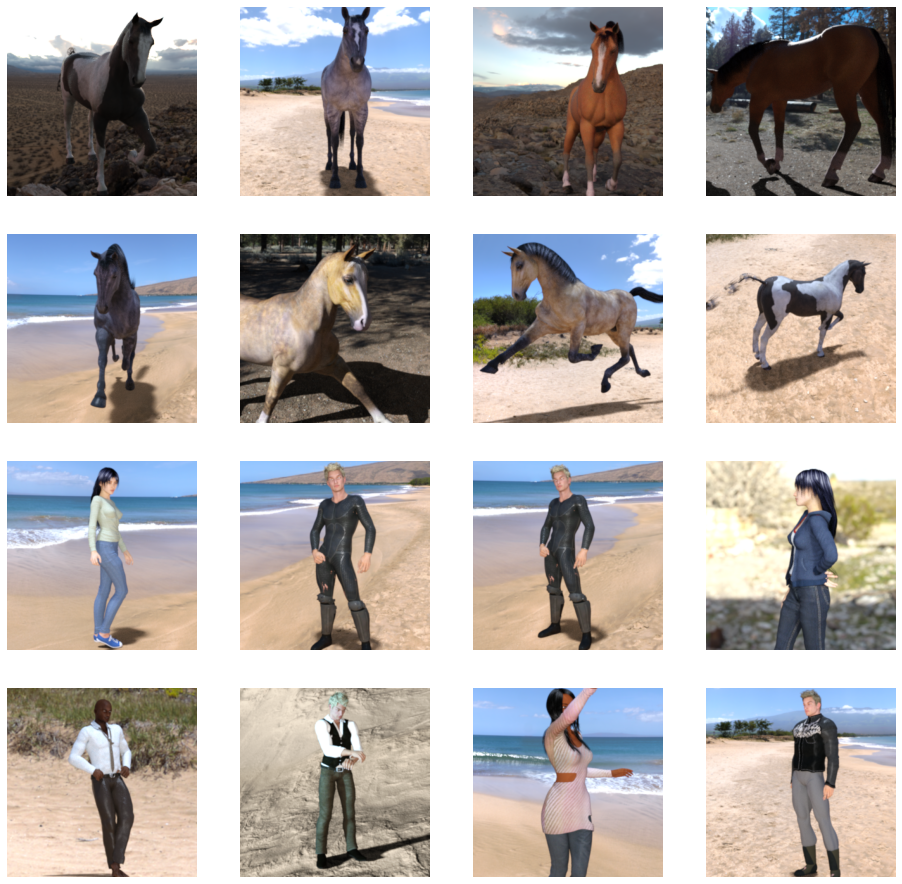

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.


In [0]:
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers.

Note that because we are facing a two-class classification problem, i.e. a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the NN

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3


The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the Machine Learning Crash Course.) We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

NameError: ignored